## Linear Regression, PCA & LDA NoteBook
Ethan Young - 954408

# Lab 3
**Task 3.1 - Linear Regression**  
In this task, we use a Linear Regression to fit a predictive regression model to a sample of observed datapoints. With the help of numpy, we loaded in the data and then using matplot, plotted a scatter graph of the data. Here, we then load in the LinearRegression object from sklearn and fit our data using the fit(). Then onto loading a test dataset of our regular variable and predicted the target variable using predict() on the test data according to the linear Regression model and this is plotted onto the same scatter graph. Lastly, for proof the predicted y target variable for when x = 0.48 is given also, which comes out to be y = -3.14442237


 For a target variable Y^ Prediction from x = 0.48:
[[-3.14442237]]


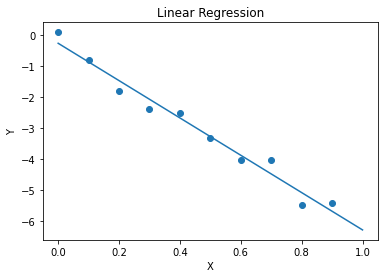

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
x_Values = np.load("x_values.npy")
y_Values = np.load("y_values.npy")
test_x_Values = np.load("test_x_values.npy")

model = LinearRegression()
model.fit(x_Values, y_Values)
prediction = model.predict(test_x_Values)

print("\n For a target variable Y^ Prediction from x = 0.48:")
print(model.predict(np.array([0.48]).reshape(-1,1)))

plt.figure()
plt.scatter(x_Values, y_Values)
plt.plot(test_x_Values, prediction)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Linear Regression")
plt.show()

**Task 3.2 - Principle Component Analysis**  
In this task, we use Principal Component Analysis to reduce the dimensionality of the Wine Dataset. We first load the wine data and labels using numpy, and then sub-divide these datasets further in an 80/20 split of training/test data using slicing. First we visualise our training/test split on a scatter graph using matplot scatter(), where the feature 0 and 1 are chosen as the axes, and respective colours/markers differenciate between labels/train:test split. Here we are ready to produce a PCA on the data, and we load in the PCA object from sklearn, and create a model with the n_components to 2, i.e. in this case, for the 2 features, 0 and 1. We use fit() to fit the PCA model to the training set and then apply the dimensionality reduction transform to both the training data and test data using transform(). Only left with visualising this PCA model using matplot scatter() where we produce a 2nd scatter graph showing the new training data and test data through PCA model.

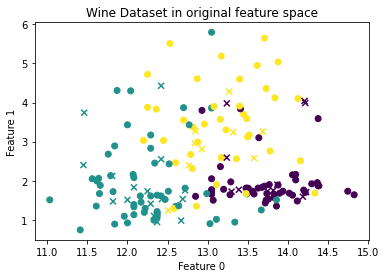

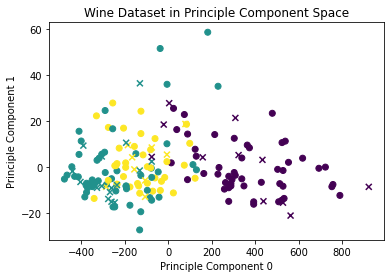

In [146]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

x_feature = 0
y_feature = 1
train_Data = data[int(0) : int(len(data) * .8),:]
train_Labels = labels[int(0) : int(len(labels) * .8),]
test_Data = data[int(len(data) * .8) : int(len(data)), :]
test_Labels = labels[int(len(labels) * .8) : int(len(labels)),]

plt.figure()
plt.scatter(train_Data[:, x_feature], train_Data[:, y_feature], c=train_Labels)
plt.scatter(test_Data[:, x_feature], test_Data[:, y_feature], c=test_Labels, marker="x")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.title("Wine Dataset in original feature space")
plt.show()

pca = PCA(n_components=2)
pca.fit(train_Data)
train_pca = pca.transform(train_Data)
test_pca = pca.transform(test_Data)

plt.figure()
plt.scatter(train_pca[:, x_feature], train_pca[:, y_feature], c=train_Labels)
plt.scatter(test_pca[:, x_feature], test_pca[:, y_feature], c=test_Labels, marker="x")
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Dataset in Principle Component Space")
plt.show()

**Task 3.3 - Linear Discriminant Analysis**  
3rd Task is to use Linear Discriminant Analysis to reduce the dimensionality of the wine Dataset. This is different in the way it uses a supervised technique to reduce the dimensionality. Using the same train:test split as in task 3.2 of the wine data set, we can jump straight into creating a linear Discriminant analysis object from sklearn, and then fit our training data, however as this is supervised, we also provide our training labels in the fit() arguments as well. Then onto applying the transform() to both the training and testing data, and using matplot to produce a scatter graph of the LDA model on our data.

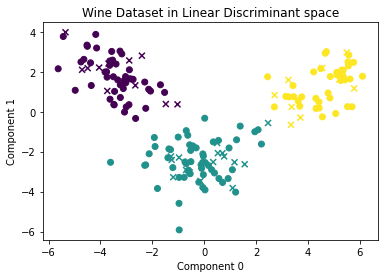

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

x_feature = 0
y_feature = 1
train_Data = data[int(0) : int(len(data) * .8),:]
train_Labels = labels[int(0) : int(len(labels) * .8),]
test_Data = data[int(len(data) * .8) : int(len(data)), :]
test_Labels = labels[int(len(labels) * .8) : int(len(labels)),]

lda = LinearDiscriminantAnalysis()
lda.fit(train_Data, train_Labels)

train_lda = lda.transform(train_Data)
test_lda = lda.transform(test_Data)

plt.figure()
plt.scatter(train_lda[:, x_feature], train_lda[:, y_feature], c=train_Labels)
plt.scatter(test_lda[:, x_feature], test_lda[:, y_feature], c=test_Labels, marker="x")
plt.xlabel("Component 0")
plt.ylabel("Component 1")
plt.title("Wine Dataset in Linear Discriminant space")
plt.show()

**Task 3.4 - Principle Component Analysis by Hand**  
Last task is to do the PCA by hand, which means without using the PCA from sklearn, and instead, use the equations and logic, to transpose our data to a principle component space. Again, we're using the same train:test split of the wine data in task 3.2. First we must calculate the mean-centre of the training data, which means, find the mean vector of the training dataset, and then subtract the vector away from the training data samples. Here we use numpy mean() with an another argument of axis which corresponds to which axis the mean is from. We then aquire the v transposed (vh) by using the numpy linalg.svd() where we get the variables of u,s,vh from the equation of X=USVh, however only need the vh. We use the variable vh to then project the data into a 2-dimensional Principle component space in a project matrix using transpose() on the vh variable, here we slice the noise out and only have the significant data that information is sound. The centered training data is then matrix multiplied by the projected matrix to give us our PCA for training data. We then reuse the mean vector and projected matrix from before for the test data as the model has already been fit to that, so we need to apply the same here. (if we recalculated the mean for test data, then it's cheating as the model isn't 'learning') Lastly, was to visualise the projected training and test data onto a matplot scatter graph, where we can see the same graph as in task 3.2 (ergo replicating the PCA by hand) only small note is that it is flipped but the sign doesn't matter as it's a vector.

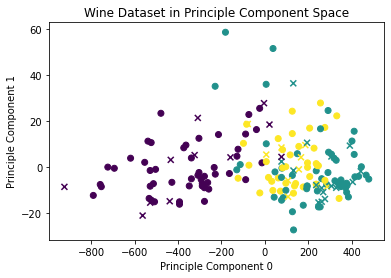

In [192]:
import numpy as np
import matplotlib.pyplot as plt

data = np.load("wineData.npy")
labels = np.load("wineLabels.npy")

x_feature = 0
y_feature = 1
train_Data = data[int(0) : int(len(data) * .8),:]
train_Labels = labels[int(0) : int(len(labels) * .8),]
test_Data = data[int(len(data) * .8) : int(len(data)), :]
test_Labels = labels[int(len(labels) * .8) : int(len(labels)),]

mean_vector = np.mean(train_Data, axis=0)
centered_train_Data = train_Data - mean_vector
u,s,vh = np.linalg.svd(centered_train_Data)
projected_matrix = np.transpose(vh[0:2, :])
projected_train_Data = centered_train_Data @ projected_matrix

centered_test_Data = test_Data - mean_vector
projected_test_Data = centered_test_Data @ projected_matrix

plt.figure()
plt.scatter(projected_train_Data[:, x_feature], projected_train_Data[:, y_feature], c=train_Labels)
plt.scatter(projected_test_Data[:, x_feature], projected_test_Data[:, y_feature], c=test_Labels, marker="x")
plt.xlabel("Principle Component 0")
plt.ylabel("Principle Component 1")
plt.title("Wine Dataset in Principle Component Space")
plt.show()